##Importing and Loading the Dataset

In [1]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##Checking for Duplicates

In [3]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


##Getting Info about the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##Summary Descriptive Statistics

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##Data Preprocessing
-Handling Missing Values
-Scaling Numeric Features
-Spilt the Data into Training and Testing Spilts

In [7]:
(df==0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Replace 0 values with the median
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, df[col].median())


# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.547919,-1.237941,-0.031990,-0.469981,-0.608201,-0.065626,-0.507006,-1.041549
618,1.530847,-0.317447,0.795225,-0.361556,-0.608201,-0.618684,2.446670,1.425995
346,-0.844885,0.570172,-2.182747,-0.903679,-0.110471,-0.545914,0.550035,-0.956462
294,-1.141852,1.293417,-1.851862,-0.469981,-0.608201,-1.535596,-0.658012,2.702312
231,0.639947,0.405798,0.629782,1.047963,2.610453,2.001064,-0.706334,1.085644


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.639947,-0.777694,-1.190090,0.614265,0.903950,0.225457,-0.126471,0.830381
324,-0.547919,-0.317447,0.216174,0.505840,-0.608201,0.472877,-0.978145,-1.041549
624,-0.547919,-0.448946,-0.693761,-0.469981,-0.608201,-0.240276,-0.947944,-1.041549
690,1.233880,-0.481821,0.629782,-0.469981,-0.608201,-1.142634,1.160099,0.064591
473,0.936914,0.471547,1.456996,-0.469981,-0.608201,-0.371264,-0.790898,1.425995


,Outcome
60,0
618,1
346,0
294,0
231,1


,Outcome
668,0
324,0
624,0
690,0
473,0


In [9]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#checking how good your machine learning model is
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7662
Precision: 0.6792
Recall: 0.6545
F1-score: 0.6667


In [11]:
y_pred = model.predict(X_test)
print("First 5 predictions:", y_pred[:5])

First 5 predictions: [0 0 0 0 0]


In [13]:
# Create sample data (replace with your desired values)
sample_data = pd.DataFrame([[1, 85, 66, 29, 0, 26.6, 0.351, 31]], columns=X.columns)

# Scale the sample data using the same scaler
sample_data_scaled = scaler.transform(sample_data)

# Make a prediction
prediction = model.predict(sample_data_scaled)

# Print the prediction
print("Prediction for sample data:", prediction[0])

Prediction for sample data: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


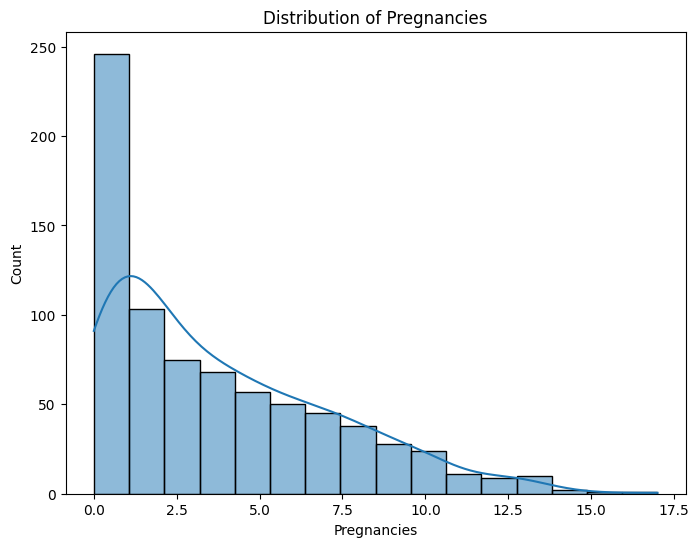

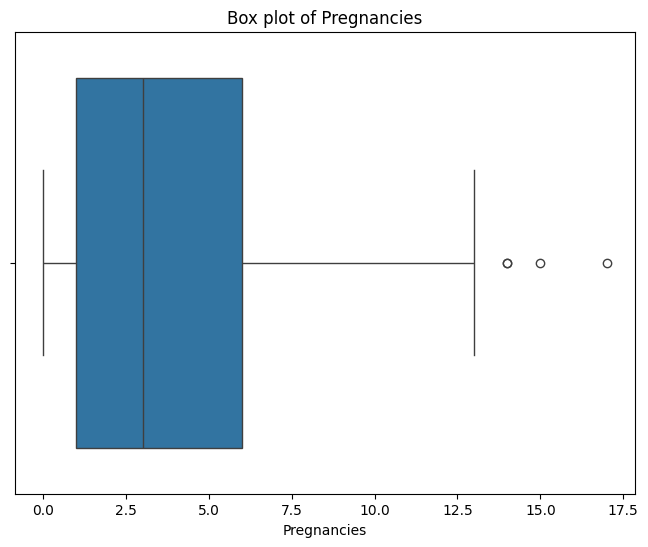

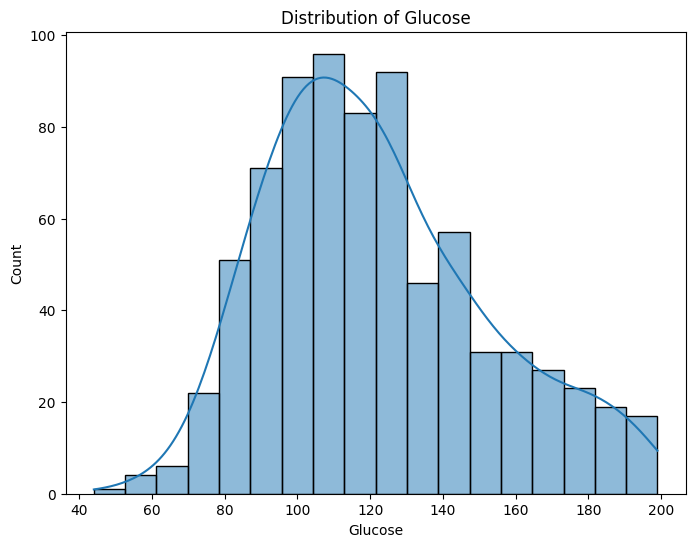

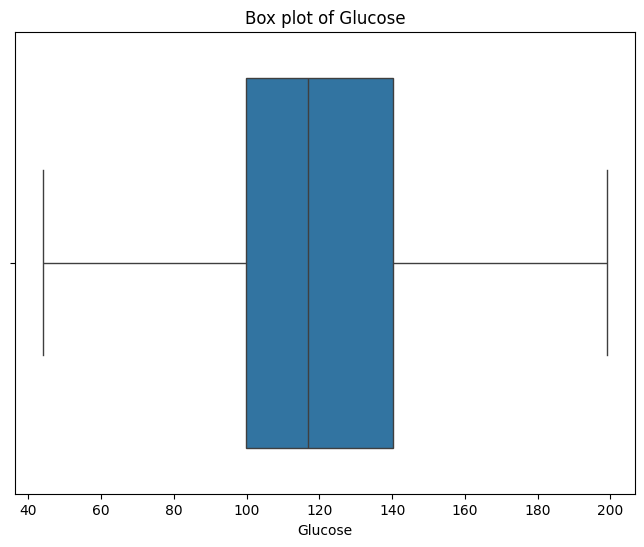

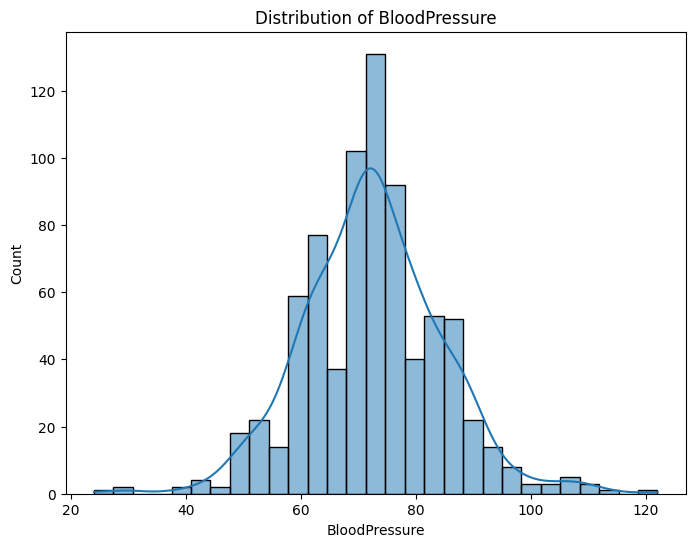

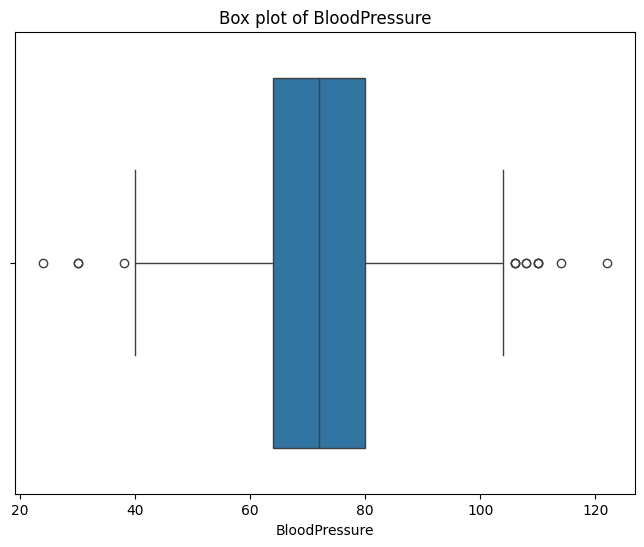

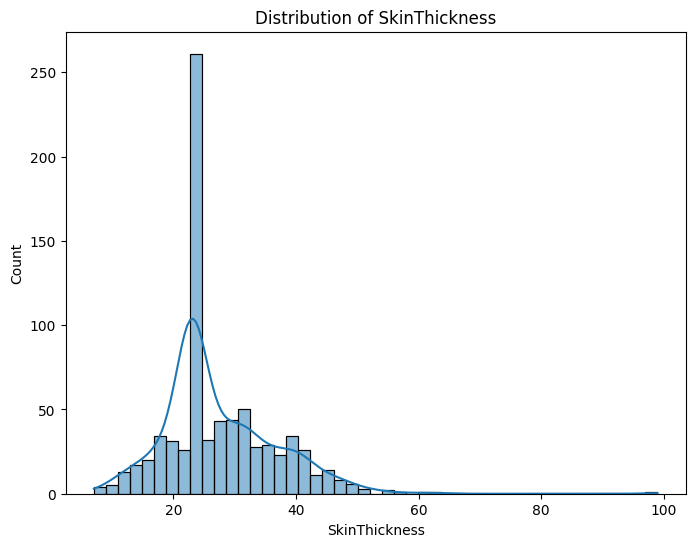

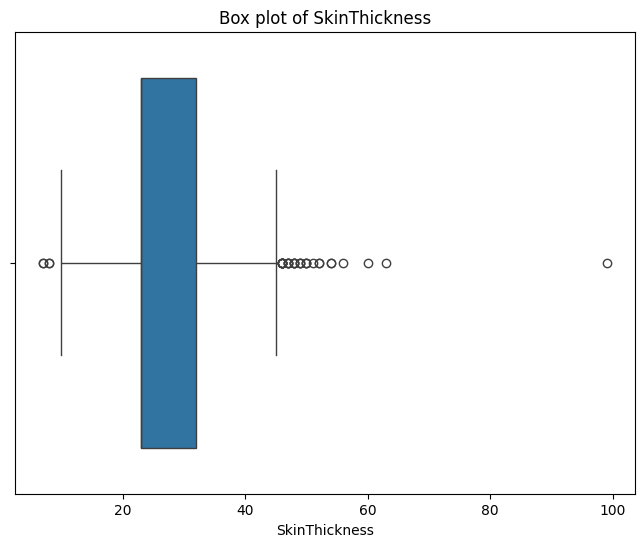

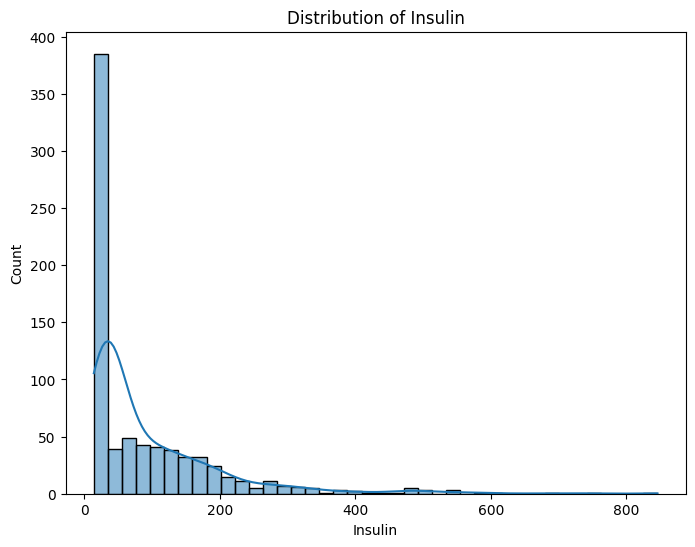

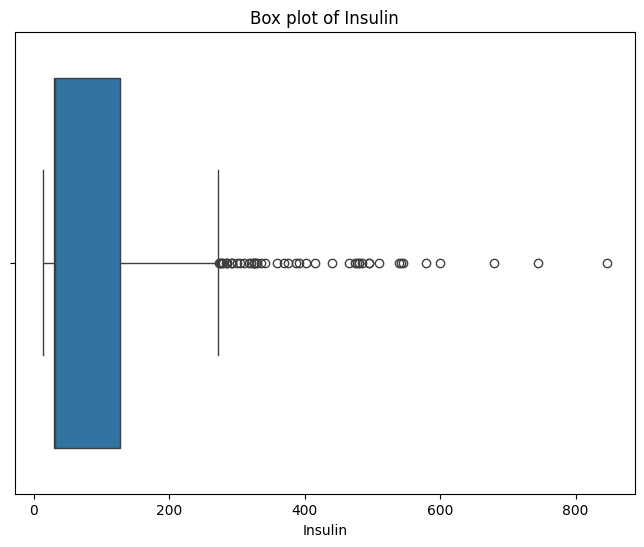

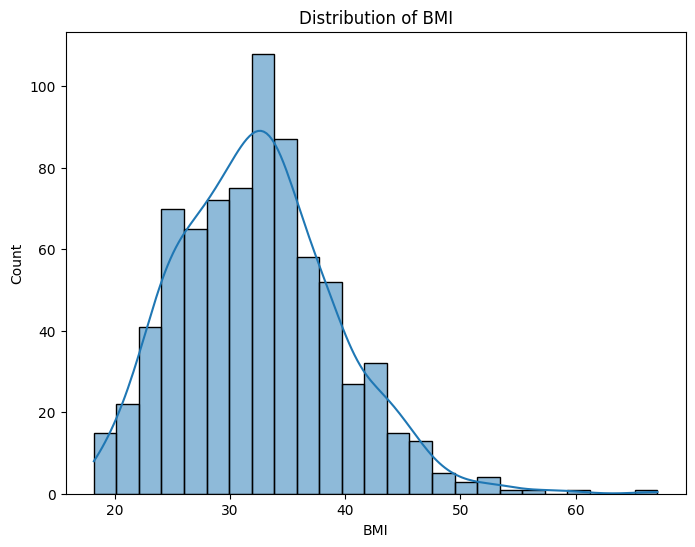

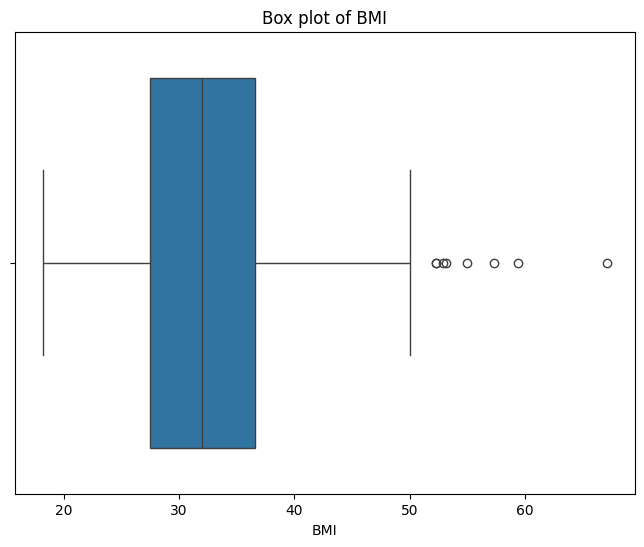

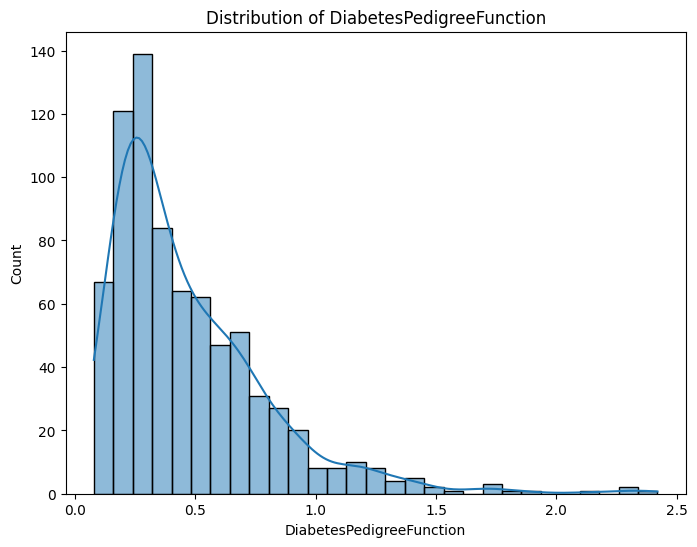

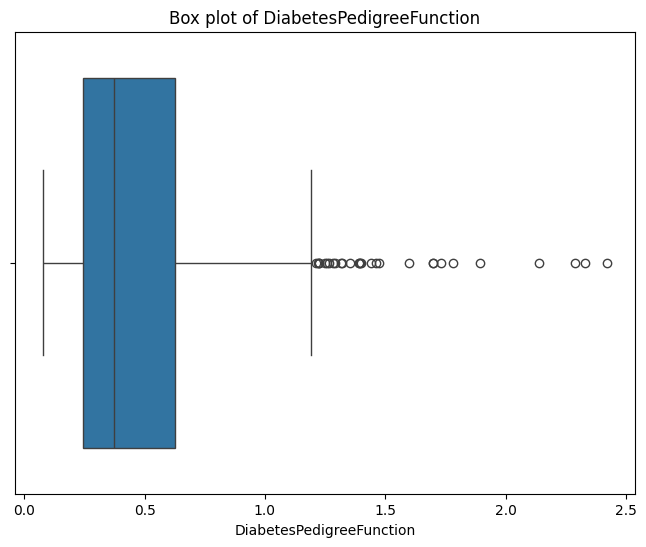

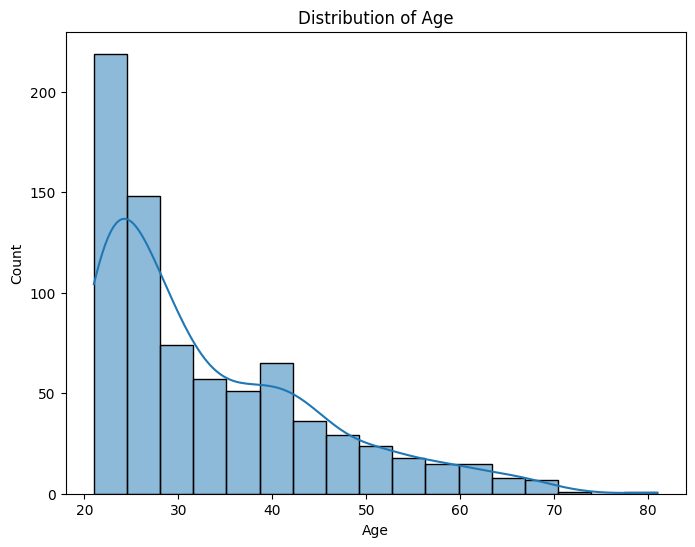

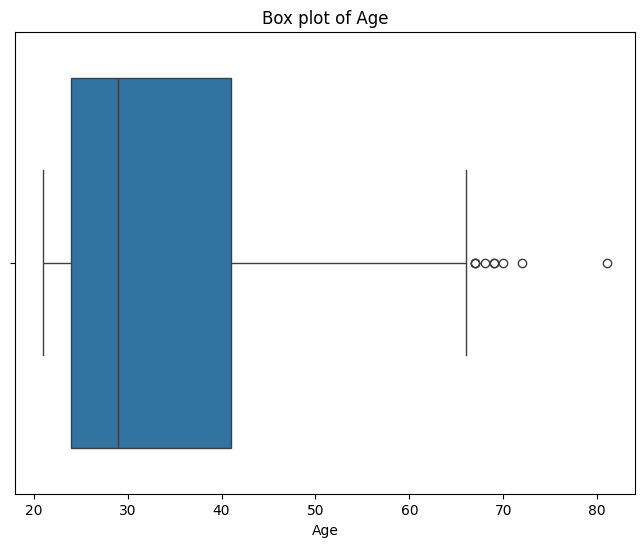

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate through each column (excluding 'Outcome')
for col in df.columns[:-1]:
    # Create a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    # Create a box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()